Exploring Neural Network Calibration for Predicting Implied Volatility and Log-Moneyness
This Jupyter Notebook demonstrates the results of a Neural Network calibrated to predict Implied Volatility (IV) and Log-Moneyness (Log(F/K)). The primary goal is to validate the model’s consistency with the Black-Scholes framework, focusing on relationships between Greeks, Implied Volatility, Days to Expiry (DTE), and Log-Moneyness.

The model was calibrated over 50 epochs using synthetically generated data, structured on an exhaustive grid with 100 points for each dimension (DTE, IV, Log(F/K)), resulting in a dataset size of 1,000,000 samples. This comprehensive approach ensures broad coverage of typical parameter ranges.

To optimize performance:

GPU-accelerated training was employed, leading to faster calibration times.
Peak VRAM usage was capped at 1.6 GB, despite 16 GB being available, ensuring computational efficiency and scalability.
The graphs below compare the predicted vs actual values for Log-Moneyness and IV, showcasing the accuracy of the calibration process. These results provide a foundation for verifying consistency across the model’s outputs and the theoretical expectations of the Black-Scholes framework.

Using device: cuda
Generating training data...
Training the model...
Epoch 1/100, Loss: 0.339949
Epoch 2/100, Loss: 0.096660
Epoch 3/100, Loss: 0.065718
Epoch 4/100, Loss: 0.058622
Epoch 5/100, Loss: 0.054553
Epoch 6/100, Loss: 0.046050
Epoch 7/100, Loss: 0.041782
Epoch 8/100, Loss: 0.040922
Epoch 9/100, Loss: 0.034039
Epoch 10/100, Loss: 0.030235
Saved model weights at epoch 10
Epoch 11/100, Loss: 0.025076
Epoch 12/100, Loss: 0.027428
Epoch 13/100, Loss: 0.024023
Epoch 14/100, Loss: 0.024577
Epoch 15/100, Loss: 0.022720
Epoch 16/100, Loss: 0.018121
Epoch 17/100, Loss: 0.018602
Epoch 18/100, Loss: 0.015215
Epoch 19/100, Loss: 0.016527
Epoch 20/100, Loss: 0.013510
Saved model weights at epoch 20
Epoch 21/100, Loss: 0.013850
Epoch 22/100, Loss: 0.011486
Epoch 23/100, Loss: 0.012756
Epoch 24/100, Loss: 0.012470
Epoch 25/100, Loss: 0.012098
Epoch 26/100, Loss: 0.010913
Epoch 27/100, Loss: 0.011023
Epoch 28/100, Loss: 0.009207
Epoch 29/100, Loss: 0.009520
Epoch 30/100, Loss: 0.008412
Saved 

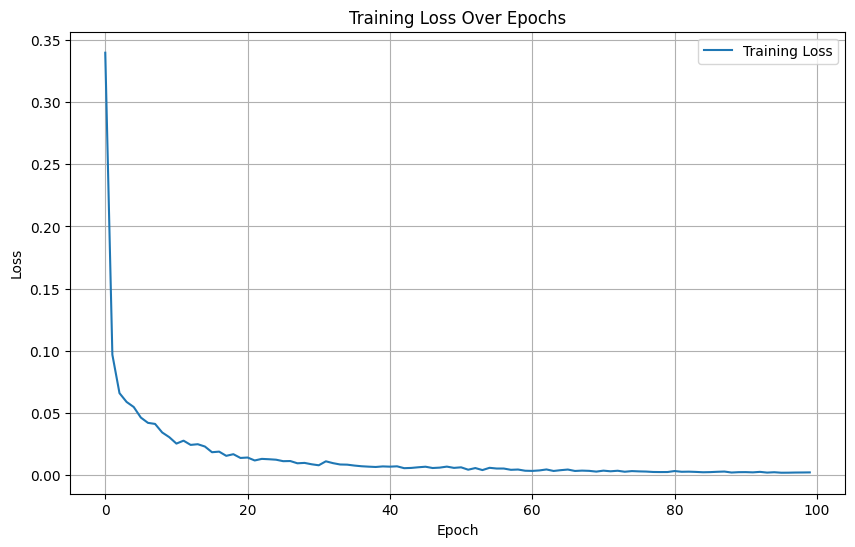

In [1]:
#Calibration
import NeuralNetworkExperiment
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
NeuralNetworkExperiment.main()

Using device: cuda
Loading weights from: model_epoch_100.pth
Model weights loaded successfully.


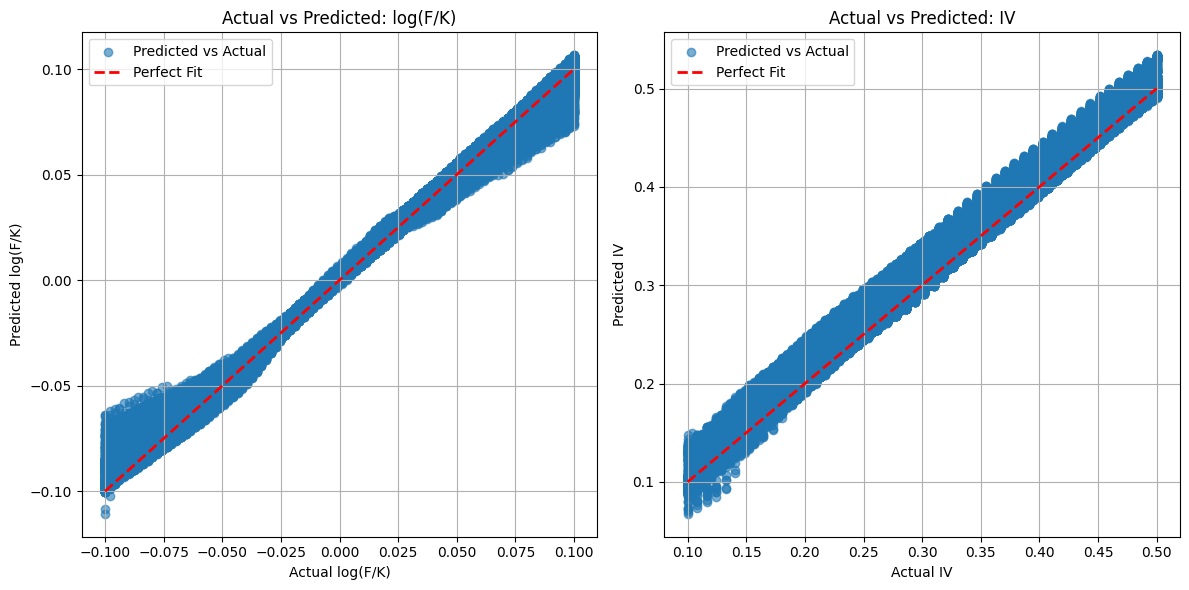

In [2]:
import NeuralNetworkPrediction

NeuralNetworkPrediction.main()

The high deviations observed at the extremities might stem from distortions in the Black-Scholes model when dealing with extreme input values. As a general rule, the closer the predictions are to the diagonal, the better the calibration.

An alternative way to validate the model is to fix specific values for Implied Volatility (IV) and Days to Expiry (DTE), then generate Greeks across a range of log-moneyness values. Using this generated data, the neural network should be able to reverse-engineer the log-moneyness range and recover the (constant) volatility.

Below, we illustrate this alternative validation method. In essence, this approach is equivalent to plotting the Greeks across multiple log-moneyness values but applied in reverse—recovering log-moneyness and IV from the neural network's predictions.

The implied volatility graph shows the ratio of Predicted IV to Real IV. Within the specified log-moneyness range and for the chosen IV, the predictions demonstrate high accuracy, with a deviation of approximately 40 basis points (bps). For example, if the true IV is 20%, the predicted IV lies within 20% ± 0.40%×20%, showcasing excellent precision.

Using device: cuda
MSE for log(F/K): 0.000017
MSE for sigma: 0.000007


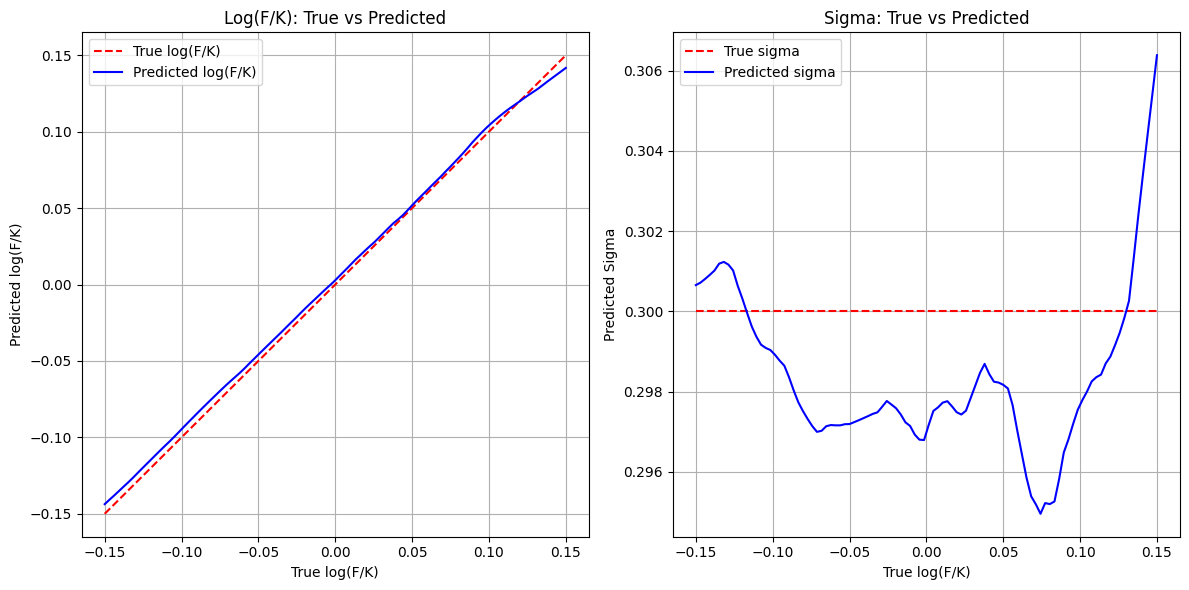

In [3]:
import AlternativeValidation

AlternativeValidation.validate_model()